数据集Wine Reviews

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from efficient_apriori import apriori
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('../data/winemag-data_first150k.csv', index_col=0)
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

属性类别数: 10
总行数: 150930
示例数据:


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


#### 挖掘葡萄酒产地、品种、打分之间的关系
1. 去除缺失数据项

In [30]:
print('原始数据行数:', len(data))
data = data[['country', 'province', 'variety', 'points']]
data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(data))

原始数据行数: 150930
将缺失部分剔除后数据行数: 150925


将country和province组合成产地

In [31]:
data['location'] = data['country'] + '-' + data['province']
data = data[['location', 'variety', 'points']]
data.head()

,location,variety,points
0,US-California,Cabernet Sauvignon,96
1,Spain-Northern Spain,Tinta de Toro,96
2,US-California,Sauvignon Blanc,96
3,US-Oregon,Pinot Noir,96
4,France-Provence,Provence red blend,95


打分的直方图

<AxesSubplot:ylabel='Frequency'>

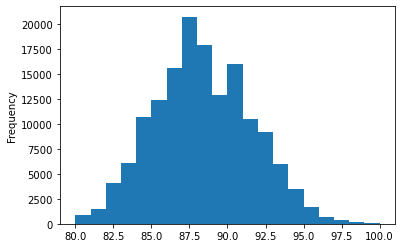

In [32]:
data['points'].plot.hist(bins=20)

可以看出数据分布在 [80, 100] 之间，因此可以将这些数据按区间转化为离散值：

In [33]:
values = [75, 80, 85,90,95,100]
data['points'] = pd.cut(data['points'],values)
data['points'] = data['points'].astype('str')
print(data['points'].value_counts())
data.head()

(85, 90]     83083
(80, 85]     34707
(90, 95]     30972
(95, 100]     1265
(75, 80]       898
Name: points, dtype: int64


,location,variety,points
0,US-California,Cabernet Sauvignon,"(95, 100]"
1,Spain-Northern Spain,Tinta de Toro,"(95, 100]"
2,US-California,Sauvignon Blanc,"(95, 100]"
3,US-Oregon,Pinot Noir,"(95, 100]"
4,France-Provence,Provence red blend,"(90, 95]"


In [34]:
apriori_data = []
for _, (loc, var, poi) in tqdm.tqdm(data.iterrows(), total=len(data)):
    apriori_data.append((loc, var, poi))

100%|██████████| 150925/150925 [00:07<00:00, 19612.35it/s]


#### 挖掘频繁模式

In [35]:
itemsets, rules = apriori(apriori_data, min_support=0.005,  min_confidence=0.3)

频繁模式

In [36]:
itemsets

{1: {('Cabernet Sauvignon',): 12800,
  ('US-California',): 44508,
  ('(95, 100]',): 1265,
  ('Spain-Northern Spain',): 4892,
  ('Sauvignon Blanc',): 6320,
  ('US-Oregon',): 4589,
  ('Pinot Noir',): 14288,
  ('(90, 95]',): 30972,
  ('France-Provence',): 1021,
  ('Italy-Northeastern Italy',): 1982,
  ('France-Southwest France',): 1601,
  ('Chardonnay',): 14482,
  ('Tempranillo',): 2556,
  ('Malbec',): 3208,
  ('Rosé',): 2817,
  ('Tempranillo Blend',): 756,
  ('Syrah',): 5825,
  ('US-Washington',): 9750,
  ('(85, 90]',): 83083,
  ('Italy-Tuscany',): 7281,
  ('Sangiovese',): 3345,
  ('Sparkling Blend',): 2004,
  ('France-Rhône Valley',): 1318,
  ('Red Blend',): 10061,
  ('Petite Sirah',): 897,
  ('France-Burgundy',): 4308,
  ('France-Loire Valley',): 1786,
  ('US-New York',): 2428,
  ('Riesling',): 5524,
  ('Argentina-Mendoza Province',): 4742,
  ('Portuguese Red',): 2216,
  ('Portugal-Alentejano',): 872,
  ('Italy-Piedmont',): 4093,
  ('Nebbiolo',): 2241,
  ('Pinot Gris',): 1365,
  ('Fran

关联规则

In [37]:
rules

[{Cabernet Sauvignon} -> {US-California},
 {Sauvignon Blanc} -> {US-California},
 {US-Oregon} -> {Pinot Noir},
 {(90, 95]} -> {US-California},
 {Pinot Noir} -> {US-California},
 {Tempranillo} -> {Spain-Northern Spain},
 {Spain-Northern Spain} -> {Tempranillo},
 {Chardonnay} -> {US-California},
 {Chardonnay} -> {(85, 90]},
 {US-California} -> {(85, 90]},
 {Italy-Tuscany} -> {(85, 90]},
 {Sangiovese} -> {(85, 90]},
 {Sangiovese} -> {Italy-Tuscany},
 {Italy-Tuscany} -> {Sangiovese},
 {Sparkling Blend} -> {(85, 90]},
 {US-Washington} -> {(85, 90]},
 {France-Rhône Valley} -> {(85, 90]},
 {Red Blend} -> {(85, 90]},
 {Italy-Tuscany} -> {Red Blend},
 {Syrah} -> {(85, 90]},
 {Cabernet Sauvignon} -> {(85, 90]},
 {France-Burgundy} -> {(85, 90]},
 {France-Burgundy} -> {Chardonnay},
 {France-Loire Valley} -> {(85, 90]},
 {Sauvignon Blanc} -> {(85, 90]},
 {France-Loire Valley} -> {Sauvignon Blanc},
 {Pinot Noir} -> {(85, 90]},
 {Riesling} -> {(85, 90]},
 {US-New York} -> {(85, 90]},
 {Malbec} -> {Ar

支持度和置信度

In [38]:
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'support:', rule.support, 'confidence:', rule.confidence)

{(85, 90], Italy-Tuscany} -> {Red Blend} support: 0.008381646513168792 confidence: 0.3009039010466223
{Italy-Piedmont} -> {(90, 95]} support: 0.008189498095080338 confidence: 0.3019789885169802
{Cabernet Sauvignon, US-California} -> {(90, 95]} support: 0.014961073380818287 confidence: 0.30300590445517983
{Italy-Tuscany} -> {Red Blend} support: 0.014676163657445751 confidence: 0.3042164537838209
{Bordeaux-style Red Blend} -> {(85, 90], France-Bordeaux} support: 0.01501407984098062 confidence: 0.3084252075677147
{Rosé} -> {France-Provence} support: 0.005777704157694219 confidence: 0.3095491657791977
{Sauvignon Blanc} -> {(80, 85]} support: 0.013271492463143946 confidence: 0.31693037974683547
{(85, 90], Sauvignon Blanc} -> {US-California} support: 0.007798575451383137 confidence: 0.3200108754758021
{Malbec} -> {(85, 90], Argentina-Mendoza Province} support: 0.006811330130859699 confidence: 0.3204488778054863
{Italy-Tuscany} -> {(90, 95]} support: 0.015464634752360444 confidence: 0.3205603

利用Lift、卡方对规则进行评价

In [39]:
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'lift:', rule.lift, 'conviction:', rule.conviction)

{(85, 90], Italy-Tuscany} -> {Red Blend} lift: 4.513857595215333 conviction: 1.3350635922594771
{Italy-Piedmont} -> {(90, 95]} lift: 1.4715284399433435 conviction: 1.1386268826697599
{Cabernet Sauvignon, US-California} -> {(90, 95]} lift: 1.476532549719037 conviction: 1.1403044780744738
{Italy-Tuscany} -> {Red Blend} lift: 4.563549178741991 conviction: 1.3414196904664089
{Bordeaux-style Red Blend} -> {(85, 90], France-Bordeaux} lift: 16.425220343033644 conviction: 1.418823344641709
{Rosé} -> {France-Provence} lift: 45.757794167703636 conviction: 1.4385311739164621
{Sauvignon Blanc} -> {(80, 85]} lift: 1.3781864627680622 conviction: 1.1273200775354701
{(85, 90], Sauvignon Blanc} -> {US-California} lift: 1.0851451734785977 conviction: 1.036926227817702
{Malbec} -> {(85, 90], Argentina-Mendoza Province} lift: 21.95358460408217 conviction: 1.4500797841382385
{Italy-Tuscany} -> {(90, 95]} lift: 1.5620745422809956 conviction: 1.169766149261766
{(90, 95]} -> {US-California} lift: 1.0940816698

#### 结果展示

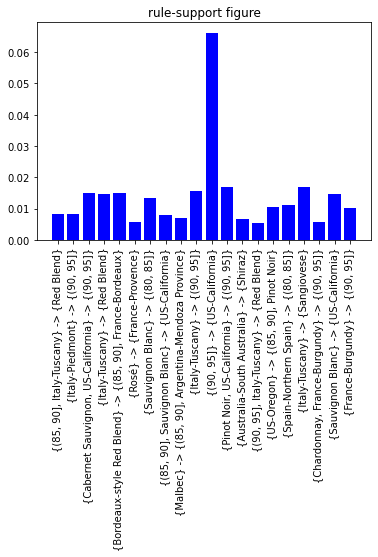

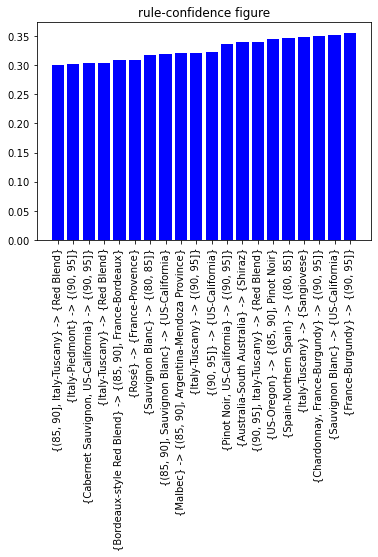

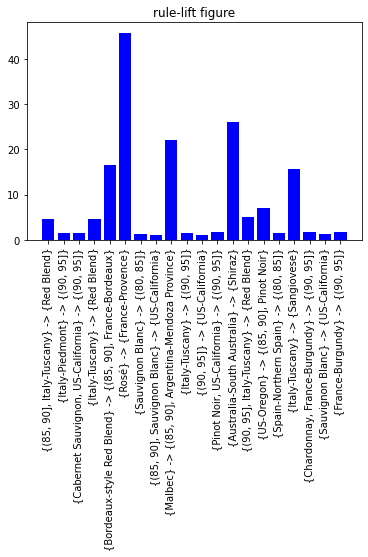

In [41]:
def plot_bar(rules, data, title):
    plt.title(title)
    plt.xticks(range(len(data)),rules,rotation=90)
    plt.bar(range(len(data)), data, color = 'b')
    # plt.savefig('figures\\'+title+'.png')
    plt.show()

def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for rule in big_rule_list:
        rules.append(repr(rule))
        conf.append(rule.confidence)
        support.append(rule.support)
        lift.append(rule.lift)
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

visualization(sorted(rules, key=lambda rule: rule.confidence)[:20])

从结果可以看出，葡萄酒的品种和产地是具有一定的必然关系的，并且也很大程度上也影响打分。